# Global Mental Health Insights

### A Data-Driven Analysis by Neuro Compass Foundation

##### Date: 11 Nov 2024
##### Prepared by: Kuodo Cheok, Data Analyst

#### Overview:
As a data analyst with the research team at Neuro Compass Foundation, my objective is to conduct an in-depth analysis of five key mental health disorders: Anxiety, Bipolar Disorder, Depression, Eating Disorder, and Schizophrenia. This analysis aims to provide data-driven insights into the global distribution, prevalence, and trends of these disorders. It also examines correlations between mental health metrics, socioeconomic factors such as GDP per capita, and suicide rates, highlighting significant regional disparities.

The findings will support the foundation’s mission by informing advocacy efforts, guiding resource allocation, shaping policymaking, and enabling targeted mental health interventions globally.

# 1. Datasets

I have sourced a total of 4 datasets to be used for this analysis.

#### Dataset 1:
#### 1- mental-illnesses-prevalence.csv
This dataset contains information about the prevalence of mental health disorders in countries across the globe.

source: https://www.kaggle.com/datasets/imtkaggleteam/mental-health

**`Entity:`** Unique identifier for each country or region included in the data set. (String)

**`Code:`** Unique code associated with an Entity/Country or region included in the data set. (String)

**`Year:`** Year that the data about that particular Entity/Country was collected. (Integer)

**`Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized:`** Percentage of people with schizophrenia in that country/region during that year. (Float)

**`Depressive disorders (share of population) - Sex: Both - Age: Age-standardized:`** Percentage of people with depression in that country/region during that year. (Float)

**`Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized:`** Percentage of people with anxiety disorders in that country/region during that year. (Float)

**`Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized:`** Percentage of people with bipolar Disorder in that country/region during that year. (Float)

**`Eating disorders (share of population) - Sex: Both - Age: Age-standardized:`** Percentage of people with eating disorders in that country/region during that year. (Float)

Previous dataset contains both drug and alcohol addiction/ Disorder. Since they are related to substance abuse and also showed no significant correlation in the previous study, it is alright to drop them for this study.

#### Dataset 2:
#### suicide homicide gdp.csv
This dataset contains information about the homicide, suicide, GDP and income level of different countries.

source: https://www.kaggle.com/datasets/prasertk/homicide-suicide-rate-and-gdp

**`country:`** Unique identifier for each country included in the data set. (String)

**`iso3c:`** Unique code associated with a Country included in the data set. (String)

**`iso2c:`** Unique code associated with a Country included in the data set. (String)

**`year:`** Year that the data about that particular Country was collected. (Integer)

**`Intentional homicides (per 100,000 people):`** Intentional homicide rate per 100k people. (Float)

**`Suicide mortality rate (per 100,000 population):`** Suicide rate per 100k people. (Float)

**`GDP (current US$):`** Gross Domestic Product of each Country in that year was collected. (Float)

**`GDP per capita, PPP (current international $):`** Gross Domestic Product per person of each Country in that year was collected. (Float)

**`adminregion:`** World Bank region in the world. (String)

**`incomeLevel:`** World Bank income level. (String)

#### Dataset 3:
#### master.csv
This dataset was originally considered but it contained too many missing data. However, it does contain data of **`Puerto Rico`** to serve as supplementary support for missing data of dataset 2, which is useful.

source: https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016

**`country:`** Unique identifier for each country included in the data set. (String)

**`year:`** Year that the data about that particular Country was collected. (Integer)

**`sex:`** Gender of people who commited suicide for each Country and year was collected. (String)

**`age:`** Age group of people who commited suicide for each Country and year was collected. (String)

**`suicides_no:`** Number of people who commited suicide for each Country and year was collected. (Integer)

**`population:`** Population of each Country who commited suicide in that year was collected. (Integer)

**`suicides/100k pop:`** Percentage of people per 100k population who commited suicide for each Country in that year was collected. (Float)

**`country-year:`** Concatenated ID for country and year. (String)

**`HDI for year:`** Human Development Index for each Country and year. (Float)

**` gdp_for_year ($) :`** Gross Domestic Product of each Country in that year was collected. (String)

**`gdp_per_capita ($):`** Gross Domestic Product per person of each Country in that year was collected. (Integer)

**`generation:`** Generation of people who commited suicide for each Country in that year was collected. (String)

#### Dataset 4:
#### who_suicide_statistics.csv
This dataset contain data to serve as supplementary support for missing data of dataset 2, **`Dominica`**.

https://www.kaggle.com/datasets/szamil/who-suicide-statistics

**`country:`** Unique identifier for each country included in the data set. (String)

**`year:`** Year that the data about that particular Country was collected. (Integer)

**`age:`** Age group of people who commited suicide for each Country and year was collected. (String)

**`suicides_no:`** Number of people who commited suicide for each Country and year was collected. (Integer)

**`population:`** Population of each Country who commited suicide in that year was collected. (Integer)


# 2. Data import

#### Import Initial Libraries required

In [7]:
# Importing the initial required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the sklearn function/module
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

#### Importing the Data

In [9]:
# Load in the data
df1 = pd.read_csv("1- mental-illnesses-prevalence.csv")
display(df1.info())
display(df1.head())

df2 = pd.read_csv("suicide homicide gdp.csv")
display(df2.info())
display(df2.head())

df3 = pd.read_csv("master.csv")
display(df3.info())
display(df3.head())

df4 = pd.read_csv("who_suicide_statistics.csv")
display(df4.info())
display(df4.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6420 non-null   object 
 1   Code                                                                               6150 non-null   object 
 2   Year                                                                               6420 non-null   int64  
 3   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  6420 non-null   float64
 4   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized     6420 non-null   float64
 5   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized        6420 non-null   float6

None

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13566 entries, 0 to 13565
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   country                                          13566 non-null  object 
 1   iso3c                                            13464 non-null  object 
 2   iso2c                                            13413 non-null  object 
 3   year                                             13566 non-null  int64  
 4   Intentional homicides (per 100,000 people)       3840 non-null   float64
 5   Suicide mortality rate (per 100,000 population)  4620 non-null   float64
 6   GDP (current US$)                                11396 non-null  float64
 7   GDP per capita, PPP (current international $)    7238 non-null   float64
 8   adminregion                                      6987 non-null   object 
 9   incomeLevel                 

None

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,NaN,NaN,1.748887e+09,NaN,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,1.831109e+09,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,1.595555e+09,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,NaN,NaN,1.733333e+09,NaN,South Asia,Low income
4,Afghanistan,AFG,AF,1974,NaN,NaN,2.155555e+09,NaN,South Asia,Low income


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


None

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


None

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


# 3. Data Understanding

#### Basic exploration

In [12]:
# Function for data exploration
def explore_data(df, df_name="DataFrame"):
    print(f"Exploring {df_name}\n")
    
    # Dimension of the data
    print("Dimension of the data:", df.shape)
    
    print("\n", "--" * 50, "\n")
    
    # Summary of the data
    print("Summary of the data\n")
    display(df.info())
    
    print("\n", "--" * 50, "\n")
    
    # Missing values
    print("Missing values in each column\n")
    print(df.isnull().sum(), '\n')
    
    print("Missing values in the entire DataFrame\n")
    print(df.isnull().sum().sum())
    
    print("\n", "--" * 50, "\n")
    
    # Statistical description
    print("Statistical description:")
    display(df.describe())
    display(df.describe(include='all'))

In [13]:
# Understanding data1 in different ways
explore_data(df1)

Exploring DataFrame

Dimension of the data: (6420, 8)

 ---------------------------------------------------------------------------------------------------- 

Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6420 non-null   object 
 1   Code                                                                               6150 non-null   object 
 2   Year                                                                               6420 non-null   int64  
 3   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  6420 non-null   float64
 4   Depressive disorders (share of popula

None


 ---------------------------------------------------------------------------------------------------- 

Missing values in each column

Entity                                                                                 0
Code                                                                                 270
Year                                                                                   0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized      0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized         0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized            0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized            0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized             0
dtype: int64 

Missing values in the entire DataFrame

270

 -------------------------------------------------------------------------------------------

,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
count,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
mean,2004.500000,0.266604,3.767036,4.101840,0.636968,0.195664
std,8.656116,0.039383,0.925286,1.050543,0.233391,0.138380
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,1997.000000,0.242267,3.080036,3.425846,0.520872,0.096416
50%,2004.500000,0.273477,3.636772,3.939547,0.579331,0.144150
75%,2012.000000,0.286575,4.366252,4.564164,0.844406,0.251167
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688


,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
count,6420,6150,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
unique,214,205,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN
freq,30,30,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.500000,0.266604,3.767036,4.101840,0.636968,0.195664
std,NaN,NaN,8.656116,0.039383,0.925286,1.050543,0.233391,0.138380
min,NaN,NaN,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,NaN,NaN,1997.000000,0.242267,3.080036,3.425846,0.520872,0.096416
50%,NaN,NaN,2004.500000,0.273477,3.636772,3.939547,0.579331,0.144150
75%,NaN,NaN,2012.000000,0.286575,4.366252,4.564164,0.844406,0.251167


In [14]:
# Understanding data2 in different ways
explore_data(df2)

Exploring DataFrame

Dimension of the data: (13566, 10)

 ---------------------------------------------------------------------------------------------------- 

Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13566 entries, 0 to 13565
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   country                                          13566 non-null  object 
 1   iso3c                                            13464 non-null  object 
 2   iso2c                                            13413 non-null  object 
 3   year                                             13566 non-null  int64  
 4   Intentional homicides (per 100,000 people)       3840 non-null   float64
 5   Suicide mortality rate (per 100,000 population)  4620 non-null   float64
 6   GDP (current US$)                                11396 non-null  float64
 7   GD

None


 ---------------------------------------------------------------------------------------------------- 

Missing values in each column

country                                               0
iso3c                                               102
iso2c                                               153
year                                                  0
Intentional homicides (per 100,000 people)         9726
Suicide mortality rate (per 100,000 population)    8946
GDP (current US$)                                  2170
GDP per capita, PPP (current international $)      6328
adminregion                                        6579
incomeLevel                                         102
dtype: int64 

Missing values in the entire DataFrame

34106

 ---------------------------------------------------------------------------------------------------- 

Statistical description:


,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)"
count,13566.000000,3840.000000,4620.000000,1.139600e+04,7238.000000
mean,1995.000000,8.044086,10.545263,1.256303e+12,14326.351258
std,14.720144,12.180537,8.260847,5.353085e+12,17677.847021
min,1970.000000,0.000000,0.000000,8.824448e+06,285.404911
25%,1982.000000,1.356422,5.400000,2.935639e+09,2875.298395
50%,1995.000000,3.408601,8.500000,2.136323e+10,7525.316313
75%,2008.000000,9.247258,13.200000,2.583568e+11,18717.529628
max,2020.000000,141.722580,92.600000,8.756805e+13,153563.910960


,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
count,13566,13464,13413,13566.000000,3840.000000,4620.000000,1.139600e+04,7238.000000,6987,13464
unique,266,264,263,NaN,NaN,NaN,NaN,NaN,6,6
top,Afghanistan,AFG,AF,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa (excluding high income),High income
freq,51,51,51,NaN,NaN,NaN,NaN,NaN,2397,4029
mean,NaN,NaN,NaN,1995.000000,8.044086,10.545263,1.256303e+12,14326.351258,NaN,NaN
std,NaN,NaN,NaN,14.720144,12.180537,8.260847,5.353085e+12,17677.847021,NaN,NaN
min,NaN,NaN,NaN,1970.000000,0.000000,0.000000,8.824448e+06,285.404911,NaN,NaN
25%,NaN,NaN,NaN,1982.000000,1.356422,5.400000,2.935639e+09,2875.298395,NaN,NaN
50%,NaN,NaN,NaN,1995.000000,3.408601,8.500000,2.136323e+10,7525.316313,NaN,NaN
75%,NaN,NaN,NaN,2008.000000,9.247258,13.200000,2.583568e+11,18717.529628,NaN,NaN


In [15]:
# Understanding data3 in different ways
explore_data(df4)

Exploring DataFrame

Dimension of the data: (43776, 6)

 ---------------------------------------------------------------------------------------------------- 

Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


None


 ---------------------------------------------------------------------------------------------------- 

Missing values in each column

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64 

Missing values in the entire DataFrame

7716

 ---------------------------------------------------------------------------------------------------- 

Statistical description:


,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


,country,year,sex,age,suicides_no,population
count,43776,43776.000000,43776,43776,41520.000000,3.831600e+04
unique,141,NaN,2,6,NaN,NaN
top,Hungary,NaN,female,15-24 years,NaN,NaN
freq,456,NaN,21888,7296,NaN,NaN
mean,NaN,1998.502467,NaN,NaN,193.315390,1.664091e+06
std,NaN,10.338711,NaN,NaN,800.589926,3.647231e+06
min,NaN,1979.000000,NaN,NaN,0.000000,2.590000e+02
25%,NaN,1990.000000,NaN,NaN,1.000000,8.511275e+04
50%,NaN,1999.000000,NaN,NaN,14.000000,3.806550e+05
75%,NaN,2007.000000,NaN,NaN,91.000000,1.305698e+06


# 4. Data Cleaning and Preprocessing
#### Dataset 1:
- **`Code`** contains null. The reason behind that is that the Entity covers several countries and can't be represented with a single Code. As there are valuable data within these countries, I have decided to remove the **`Code`** column entire instead of removing records with null **`Code`**.
- **`Entity`** shall be changed to **`Country`** instead for better clarity and to prepare for data join.
- All the disorders column titles are too long. I shall use shorter name.
- This dataset is clean otherwise and requires no further transformation.




In [17]:
# Check null values of 'Code' column
missing_Code = df1[df1['Code'].isna()]
print(missing_Code)

                             Entity Code  Year  \
30                Africa (IHME GBD)  NaN  1990   
31                Africa (IHME GBD)  NaN  1991   
32                Africa (IHME GBD)  NaN  1992   
33                Africa (IHME GBD)  NaN  1993   
34                Africa (IHME GBD)  NaN  1994   
...                             ...  ...   ...   
6145  Upper-middle-income countries  NaN  2015   
6146  Upper-middle-income countries  NaN  2016   
6147  Upper-middle-income countries  NaN  2017   
6148  Upper-middle-income countries  NaN  2018   
6149  Upper-middle-income countries  NaN  2019   

      Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
30                                             0.219527                                   
31                                             0.219559                                   
32                                             0.219579                                   
33                                 

In [18]:
# Remove the 'Code' column
df1 = df1.drop('Code', axis=1)

# Display the DataFrame info
display(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 7 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6420 non-null   object 
 1   Year                                                                               6420 non-null   int64  
 2   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  6420 non-null   float64
 3   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized     6420 non-null   float64
 4   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized        6420 non-null   float64
 5   Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized        6420 non-null   float6

None

In [19]:
# Rename 'Entity' to 'Country'
df1.rename(columns={'Entity': 'Country'}, inplace=True)

In [20]:
# Trim the disorders names but not Country and Year
col_skip = ['Country', 'Year']
df1.columns = [
    (col[:-59] + ' (%)').title() if col not in col_skip else col.title()
    for col in df1.columns
]

# Display the DataFrame info
display(df1.info())
display(df1.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     6420 non-null   object 
 1   Year                        6420 non-null   int64  
 2   Schizophrenia Disorder (%)  6420 non-null   float64
 3   Depressive Disorder (%)     6420 non-null   float64
 4   Anxiety Disorder (%)        6420 non-null   float64
 5   Bipolar Disorder (%)        6420 non-null   float64
 6   Eating Disorder (%)         6420 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 351.2+ KB


None

,Country,Year,Schizophrenia Disorder (%),Depressive Disorder (%),Anxiety Disorder (%),Bipolar Disorder (%),Eating Disorder (%)
5202,Slovenia,2002,0.296517,3.552860,3.415472,0.547650,0.162424
1889,Estonia,2019,0.290100,3.693643,3.378816,0.522791,0.175161
1929,Ethiopia,1999,0.205702,5.011874,3.581934,0.614427,0.061397
536,Bangladesh,2016,0.276253,4.603663,3.158786,0.389434,0.109776
6106,United States Virgin Islands,2006,0.297028,3.261798,4.266065,0.921272,0.360893


#### Save DataFrame 1 into another .CSV File

In [22]:
# Save the dataset into a new csv file called 'New Global Mental Health Disorder'
df1.to_csv('Mental Disorder.csv', index=False)

#### Dataset 2:
- **`country`** and **`year`** shall be capitalised to match with other datasets.
- **`iso3c`**, **`iso2c`** and **`adminregion`** to be removed since I do not need them.
- **`GDP (current US$)`** needs to be renamed to **`GDP For Year`**, 2 decimals.
- **`GDP per capita, PPP (current international $)`** needs to be renamed to **`GDP Per Capita, PPP`**, 2 decimals.
- **`incomeLevel`** needs to be renamed to **`Income Level`**.
- **`incomeLevel`** needs to be encoded to **`Income Level Encoded`**.
- As I am only interested in the suicide and GDP data, **`Intentional homicides (per 100,000 people)`** shall be dropped.
- Ensure that all data in **`Suicide Rate Per 100k`** are in 1 decimal.
- This dataset has several missing data and should be transformed, dropped, and join with dataset 3 when required.

In [24]:
# Remove the columns not in use
df2 = df2.drop('iso3c', axis=1)
df2 = df2.drop('iso2c', axis=1)
df2 = df2.drop('Intentional homicides (per 100,000 people)', axis=1)
df2 = df2.drop('adminregion', axis=1)

# Display the DataFrame info
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13566 entries, 0 to 13565
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   country                                          13566 non-null  object 
 1   year                                             13566 non-null  int64  
 2   Suicide mortality rate (per 100,000 population)  4620 non-null   float64
 3   GDP (current US$)                                11396 non-null  float64
 4   GDP per capita, PPP (current international $)    7238 non-null   float64
 5   incomeLevel                                      13464 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 636.0+ KB


None

In [25]:
# Rename the Columns
df2.rename(columns={'Suicide mortality rate (per 100,000 population)': 'Suicide Rate Per 100k'}, inplace=True)
df2.rename(columns={'GDP (current US$)': 'GDP For Year'}, inplace=True)
df2.rename(columns={'GDP per capita, PPP (current international $)': 'GDP Per Capita, PPP'}, inplace=True)
df2.rename(columns={'incomeLevel': 'Income Level'}, inplace=True)

# Capitalize the following columns
cap_columns = ['country', 'year']

df2.columns = [col.capitalize() if col in cap_columns else col for col in df2.columns]

Drop all the records from **`Country`** that contain large numbers of nulls for **`Suicide Rate Per 100k`**:
- **`American Samoa`**
- **`Andorra`**
- **`Bermuda`**
- **`Greenland`**
- **`Guam`**
- **`Marshall Islands`**
- **`Monaco`**
- **`Nauru`**
- **`Northern Mariana Islands`**
- **`Palau`**
- **`San Marino`**
- **`Tuvalu`**

Except **`Puerto Rico`** which can be retrieved from dataset 3 and **`Dominica`** which can be retrieved from dataset 4.

Drop all the records from **`Country`** that contain large numbers of nulls for either of the GDP:
- **`Eritrea`**
- **`Somalia`**
- **`South Sudan`**

In [27]:
# Store data but ignore the above countries
df2 = df2[~df2['Country'].isin([
    'American Samoa',
    'Andorra',
    'Bermuda',
    'Greenland',
    'Guam',
    'Marshall Islands',
    'Monaco',
    'Nauru',
    'Northern Mariana Islands',
    'Palau',
    'San Marino',
    'Tuvalu',
    'Eritrea',
    'Somalia',
    'South Sudan'
])]

In [28]:
# Encode the 'Income Level' column with ordinal mapping
income_mapping = {
    'High income': 4,
    'Upper middle income': 3,
    'Lower middle income': 2,
    'Low income': 1
}

# Apply the mapping to the 'incomeLevel' column, drop 'incomeLevel'
df2['Income Level Encoded'] = df2['Income Level'].map(income_mapping)

In [29]:
# Ensure that data are all in appropriate decimals
df2['Suicide Rate Per 100k'] = df2['Suicide Rate Per 100k'].round(1)
df2['GDP For Year'] = df2['GDP For Year'].round(2)
df2['GDP Per Capita, PPP'] = df2['GDP Per Capita, PPP'].round(2)

In [30]:
# Display the DataFrame info
display(df2.info())
display(df2.sample(5))

<class 'pandas.core.frame.DataFrame'>
Index: 12801 entries, 0 to 13565
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                12801 non-null  object 
 1   Year                   12801 non-null  int64  
 2   Suicide Rate Per 100k  4560 non-null   float64
 3   GDP For Year           10957 non-null  float64
 4   GDP Per Capita, PPP    7048 non-null   float64
 5   Income Level           12699 non-null  object 
 6   Income Level Encoded   10251 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 800.1+ KB


None

,Country,Year,Suicide Rate Per 100k,GDP For Year,"GDP Per Capita, PPP",Income Level,Income Level Encoded
3651,Estonia,2000,29.1,5.686580e+09,9421.29,High income,4.0
6120,Japan,1970,NaN,2.126092e+11,NaN,High income,4.0
3742,Ethiopia,1989,NaN,1.147658e+10,NaN,Low income,1.0
3832,Europe & Central Asia,1977,NaN,2.708800e+12,NaN,Aggregates,NaN
223,Algeria,1989,NaN,5.563441e+10,NaN,Lower middle income,2.0


#### Save DataFrame 2 into another .CSV File

In [32]:
# Save the dataset into a new csv file called 'Suicides and GDP'
df2.to_csv('Suicides and GDP.csv', index=False)

#### Dataset 3:
**`Puerto Rico`** from dataset 2 contains missing data from **`Suicide Rate Per 100k`** that can be joined by dataset 3.

I only need to the following data from this dataset, and the columns shall be renamed:
- Capitalise **`country`** -> **`Country`**.
- Capitalise **`year`** -> **`Year`**.
- Current data is segregated by gender and age group, I need to transform the data and combine all the records in order to compute **`Suicide Rate Per 100k`** based on overall combined data
- **`country-year`** is useful key for combining the data but I won't need it in the final merger dataframe.

In [34]:
# Capitalize the following columns
cap_columns = ['country', 'year']

df3.columns = [col.capitalize() if col in cap_columns else col for col in df3.columns]

display(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             27820 non-null  object 
 1   Year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


None

In [35]:
# Create a new column 'Suicides' that contains the summed suicides for each country-year
df3['Suicides'] = df3.groupby('country-year')['suicides_no'].transform('sum')

# Print the resulting Suicides
df3['Suicides']

0          73
1          73
2          73
3          73
4          73
         ... 
27815    2095
27816    2095
27817    2095
27818    2095
27819    2095
Name: Suicides, Length: 27820, dtype: int64

In [36]:
# Create a new column 'Population' that contains the summed population for each country-year
df3['Population'] = df3.groupby('country-year')['population'].transform('sum')

# Print the resulting Population
df3['Population']

0         2709600
1         2709600
2         2709600
3         2709600
4         2709600
           ...   
27815    27313507
27816    27313507
27817    27313507
27818    27313507
27819    27313507
Name: Population, Length: 27820, dtype: int64

In [37]:
# Create a new column 'Suicides Per 100k' that contains the rate of suicides per 100k population
df3['Suicide Rate Per 100k'] = ((df3['Suicides'] / df3['Population']) * 100000).round(1)

In [38]:
# Retain only the specified columns
df3 = df3[['Country', 'Year', 'Suicide Rate Per 100k']]

# drop all duplicated records
df3 = df3.drop_duplicates()

In [39]:
# Check the first 10 rows where 'Country' is 'Puerto Rico'
display(df3[df3['Country'] == 'Puerto Rico'].tail(20))

display(df3.info())

,Country,Year,Suicide Rate Per 100k
19812,Puerto Rico,1996,9.7
19824,Puerto Rico,1997,8.0
19836,Puerto Rico,1998,9.3
19848,Puerto Rico,1999,8.3
19860,Puerto Rico,2000,8.7
19872,Puerto Rico,2001,8.2
19884,Puerto Rico,2002,6.8
19896,Puerto Rico,2003,7.4
19908,Puerto Rico,2004,7.9
19920,Puerto Rico,2005,8.2


<class 'pandas.core.frame.DataFrame'>
Index: 2321 entries, 0 to 27808
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                2321 non-null   object 
 1   Year                   2321 non-null   int64  
 2   Suicide Rate Per 100k  2321 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 72.5+ KB


None

In [40]:
def update_suicide_rate(df_main, df_source, country_name):
    """
    Update the 'Suicide Rate Per 100k' column in df_main for a given country using data from df_source.

    Parameters:
    df_main (pd.DataFrame): The primary DataFrame to be updated.
    df_source (pd.DataFrame): The source DataFrame containing new suicide rate data.
    country_name (str): The country to filter for and update.

    Returns:
    pd.DataFrame: The updated DataFrame.
    """
    # Step 1: Filter df_source for the specified country
    filtered_df = df_source[df_source['Country'] == country_name][['Country', 'Year', 'Suicide Rate Per 100k']]

    # Step 2: Merge the filtered data into df_main
    df_main = pd.merge(
        df_main, 
        filtered_df, 
        on=['Country', 'Year'], 
        how='left', 
        suffixes=('', '_from_source')
    )

    # Step 3: Update the Suicide Rate Per 100k column in df_main
    df_main['Suicide Rate Per 100k'] = df_main['Suicide Rate Per 100k'].fillna(
        df_main['Suicide Rate Per 100k_from_source']
    )

    # Step 4: Drop the temporary column
    df_main.drop(columns=['Suicide Rate Per 100k_from_source'], inplace=True)

    return df_main

In [41]:
# Update df2 using df3 for 'Puerto Rico'
df2 = update_suicide_rate(df2, df3, "Puerto Rico")

# Display updated data for the specific country
display(df2[df2['Country'] == 'Puerto Rico'].tail(20))

# Display summary info
display(df2.info())

,Country,Year,Suicide Rate Per 100k,GDP For Year,"GDP Per Capita, PPP",Income Level,Income Level Encoded
9619,Puerto Rico,2001,8.2,6.920840e+10,24893.02,High income,4.0
9620,Puerto Rico,2002,6.8,7.162350e+10,25485.63,High income,4.0
9621,Puerto Rico,2003,7.4,7.482740e+10,25956.53,High income,4.0
9622,Puerto Rico,2004,7.9,8.032231e+10,28981.40,High income,4.0
9623,Puerto Rico,2005,8.2,8.391452e+10,29332.65,High income,4.0
9624,Puerto Rico,2006,7.6,8.727616e+10,29920.83,High income,4.0
9625,Puerto Rico,2007,7.8,8.952413e+10,30545.67,High income,4.0
9626,Puerto Rico,2008,8.6,9.363930e+10,30745.42,High income,4.0
9627,Puerto Rico,2009,9.5,9.638560e+10,30541.06,High income,4.0
9628,Puerto Rico,2010,8.2,9.838130e+10,30925.40,High income,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12801 entries, 0 to 12800
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                12801 non-null  object 
 1   Year                   12801 non-null  int64  
 2   Suicide Rate Per 100k  4591 non-null   float64
 3   GDP For Year           10957 non-null  float64
 4   GDP Per Capita, PPP    7048 non-null   float64
 5   Income Level           12699 non-null  object 
 6   Income Level Encoded   10251 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 700.2+ KB


None

#### Dataset 4:
**`Dominica`** from dataset 2 contains missing data from **`Suicide Rate Per 100k`** that can be joined by dataset 4.

I only need to the following data from this dataset, and the columns shall be renamed:
- Capitalise **`country`** -> **`Country`**.
- Capitalise **`year`** -> **`Year`**.
- Current data is segregated by gender and age group, I need to transform the data and combine all the records in order to compute **`Suicide Rate Per 100k`** based on overall combined data. For that, I need to fetch **`Population`** data from the internet.

In [43]:
# Capitalize the following columns
cap_columns = ['country', 'year']

df4.columns = [col.capitalize() if col in cap_columns else col for col in df4.columns]

display(df4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      43776 non-null  object 
 1   Year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


None

In [44]:
# Create a new column 'Suicides' that contains the summed suicides for each country-year
df4['Suicides'] = df4.groupby(['Country', 'Year'])['suicides_no'].transform('sum')

# Print the resulting Suicides
df4['Suicides']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
43771    764.0
43772    764.0
43773    764.0
43774    764.0
43775    764.0
Name: Suicides, Length: 43776, dtype: float64

In [45]:
# Retain only the specified columns
df4 = df4[df4['Country'] == 'Dominica'][['Country', 'Year', 'Suicides']]
df4 = df4[df4['Year'].between(2000, 2019)]

# drop all duplicated records
df4 = df4.drop_duplicates()

df4.tail()

,Country,Year,Suicides
11976,Dominica,2011,5.0
11988,Dominica,2012,2.0
12000,Dominica,2013,1.0
12012,Dominica,2014,3.0
12024,Dominica,2015,5.0


In [46]:
# List of population values for Dominica from 2000 to 2015 (maximum record)
population_list = [71000, 71000, 71000, 71000, 71000, 71000, 71000, 72000, 72000, 72000, 
                   72000, 72000, 73000, 73000, 73000, 73000]

# Filter the DataFrame for 'Dominica' and years between 2000 and 2019
df4['Population'] = population_list

In [47]:
# Create a new column 'Suicides Per 100k' that contains the rate of suicides per 100k population
df4['Suicide Rate Per 100k'] = ((df4['Suicides'] / df4['Population']) * 100000).round(1)

df4.info()
df4.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 11844 to 12024
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                16 non-null     object 
 1   Year                   16 non-null     int64  
 2   Suicides               16 non-null     float64
 3   Population             16 non-null     int64  
 4   Suicide Rate Per 100k  16 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 768.0+ bytes


,Country,Year,Suicides,Population,Suicide Rate Per 100k
11844,Dominica,2000,2.0,71000,2.8
11856,Dominica,2001,5.0,71000,7.0
11868,Dominica,2002,2.0,71000,2.8
11880,Dominica,2003,2.0,71000,2.8
11892,Dominica,2004,2.0,71000,2.8


In [48]:
# Update df2 using df4 for 'Dominica'
df2 = update_suicide_rate(df2, df4, "Dominica")

# Display updated data for the specific country
display(df2[df2['Country'] == 'Dominica'].tail(20))

# Display summary info
display(df2.info())

,Country,Year,Suicide Rate Per 100k,GDP For Year,"GDP Per Capita, PPP",Income Level,Income Level Encoded
2938,Dominica,2001,7.0,3.402037e+08,6652.96,Upper middle income,3.0
2939,Dominica,2002,2.8,3.331963e+08,6551.19,Upper middle income,3.0
2940,Dominica,2003,2.8,3.433111e+08,7070.26,Upper middle income,3.0
2941,Dominica,2004,2.8,3.672000e+08,7451.81,Upper middle income,3.0
2942,Dominica,2005,1.4,3.642556e+08,7713.17,Upper middle income,3.0
2943,Dominica,2006,0.0,3.902519e+08,8300.63,Upper middle income,3.0
2944,Dominica,2007,2.8,4.213741e+08,9054.99,Upper middle income,3.0
2945,Dominica,2008,4.2,4.581889e+08,9884.01,Upper middle income,3.0
2946,Dominica,2009,1.4,4.890741e+08,9840.24,Upper middle income,3.0
2947,Dominica,2010,4.2,4.938259e+08,10017.76,Upper middle income,3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12801 entries, 0 to 12800
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                12801 non-null  object 
 1   Year                   12801 non-null  int64  
 2   Suicide Rate Per 100k  4607 non-null   float64
 3   GDP For Year           10957 non-null  float64
 4   GDP Per Capita, PPP    7048 non-null   float64
 5   Income Level           12699 non-null  object 
 6   Income Level Encoded   10251 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 700.2+ KB


None

#### Save and overwrite DataFrame 2 into the same .CSV File

In [50]:
# Save the dataset into a new csv file called 'Suicides and GDP'
df2.to_csv('Suicides and GDP.csv', index=False)

# 5. Data Preparation

#### Merge Datasets into a Complete Dataset
- Now that both dataset 1 and 2 are ready and clean, I shall perform a left join on them with matching **`Country`** and **`Year`**.
- Data should be between **`Year`** 2000 to 2019 as these are the years that contain the most complete data required.

In [52]:
# Step 1: Filter df1 to only include rows where 'Country' exists in both
df1_filtered = df1[df1['Country'].isin(df2['Country']) & (df1['Year'] >= 2000) & (df1['Year'] <= 2019)]

# Step 2: Perform a left join on 'Country' and 'Year'
merged_df = pd.merge(df1_filtered, df2, on=['Country', 'Year'], how='left')

# Display the resulting DataFrame
display(merged_df.sample(5))
display(merged_df.info())

,Country,Year,Schizophrenia Disorder (%),Depressive Disorder (%),Anxiety Disorder (%),Bipolar Disorder (%),Eating Disorder (%),Suicide Rate Per 100k,GDP For Year,"GDP Per Capita, PPP",Income Level,Income Level Encoded
2308,Peru,2008,0.275813,2.201741,5.474124,0.919938,0.290461,2.7,1.205506e+11,8857.86,Upper middle income,3.0
452,Bulgaria,2012,0.286502,2.689495,3.422339,0.466508,0.144737,12.5,5.430086e+10,16327.87,Upper middle income,3.0
273,Belarus,2013,0.276072,3.904299,3.495811,0.521122,0.126945,27.9,7.552798e+10,18994.19,Upper middle income,3.0
184,Azerbaijan,2004,0.272104,2.705030,2.549849,0.522674,0.099076,4.3,8.680370e+09,5158.39,Upper middle income,3.0
2191,Norway,2011,0.283232,3.064978,6.861479,0.829836,0.449941,13.3,4.982834e+11,62076.74,High income,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     3220 non-null   object 
 1   Year                        3220 non-null   int64  
 2   Schizophrenia Disorder (%)  3220 non-null   float64
 3   Depressive Disorder (%)     3220 non-null   float64
 4   Anxiety Disorder (%)        3220 non-null   float64
 5   Bipolar Disorder (%)        3220 non-null   float64
 6   Eating Disorder (%)         3220 non-null   float64
 7   Suicide Rate Per 100k       3212 non-null   float64
 8   GDP For Year                3217 non-null   float64
 9   GDP Per Capita, PPP         3184 non-null   float64
 10  Income Level                3220 non-null   object 
 11  Income Level Encoded        3200 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 302.0+ KB


None

#### Observation of merged data:
- **`Cuba`** and **`Djibouti`** contains do not have sufficient **`GDP Per Capita, PPP`**. Initial decision was to keep them and update them using (https://data.worldbank.org/) and (https://statisticstimes.com/). But I failed to find the proper data for them. Therefore, I have decided to drop them both.
- Missing **`GDP Per Capita, PPP`** data from **`Afghanistan`** in **`Year`** 2000 and 2001. Drop only those 2 years.
- Missing **`GDP Per Capita, PPP`** data from **`Sao Tome and Principe`** in **`Year`** 2000. Drop that year.
- Missing **`Suicide Rate Per 100k`** data from **`Puerto Rico`** in **`Year`** 2016 to 2019. Drop those years.
- Missing **`Suicide Rate Per 100k`** data from **`Dominica in`** **`Year`** 2016 to 2019. Drop those years.
- There is also a **`World`** data under **`Country`** which I wish to save into a separate .CSV.


In [54]:
# Find all rows with null values in any column
null_data = merged_df[merged_df.isnull().any(axis=1)]

# Display or process the rows with null values
print(null_data)

          Country  Year  Schizophrenia Disorder (%)  Depressive Disorder (%)  \
0     Afghanistan  2000                    0.214515                 5.008448   
1     Afghanistan  2001                    0.214315                 5.003872   
740          Cuba  2000                    0.274915                 4.380977   
741          Cuba  2001                    0.275092                 4.314976   
742          Cuba  2002                    0.275470                 4.243866   
...           ...   ...                         ...                      ...   
3175        World  2015                    0.288030                 3.425540   
3176        World  2016                    0.288466                 3.429356   
3177        World  2017                    0.288860                 3.433322   
3178        World  2018                    0.288324                 3.437480   
3179        World  2019                    0.287409                 3.440053   

      Anxiety Disorder (%)  Bipolar Dis

In [55]:
# Save 'World' records into 'world_df'
world_df = merged_df[merged_df['Country'] == 'World']

# Drop all records for 'Cuba', 'Djibouti' and 'World'
merged_df = merged_df[~merged_df['Country'].isin(['Cuba', 'Djibouti', 'World'])]

# Drop all records that contains nulls'
merged_df = merged_df.dropna()

#### Due to the large differences in values between the values of the Mental Disorders, I have decided to scale them down between 0 to 1.

In [57]:
# Scale all the Mental Disorders
columns_to_scale = [
    'Schizophrenia Disorder (%)',
    'Depressive Disorder (%)',
    'Anxiety Disorder (%)',
    'Bipolar Disorder (%)',
    'Eating Disorder (%)'
]

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the specified columns
scaled_data = scaler.fit_transform(merged_df[columns_to_scale])

# Create a DataFrame from the scaled data with updated column names
# Remove the last 3 characters and append '(Scaled)' to each column name
scaled_column_names = [col[:-4] + ' (Scaled)' for col in columns_to_scale]

# Create the DataFrame with the new column names
scaled_df = pd.DataFrame(scaled_data, columns=scaled_column_names)

# Concatenate merged_df with scaled_df
scaled_df = pd.concat([merged_df.reset_index(drop=True), scaled_df.reset_index(drop=True)], axis=1)

# Drop all the original Mental Disorders
scaled_df = scaled_df.drop(columns=columns_to_scale)

In [58]:
display(merged_df.info())
display(merged_df.sample(5))
display(scaled_df.info())
display(scaled_df.sample(5))
display(world_df.info())
display(world_df.sample(5))

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 2 to 3219
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     3149 non-null   object 
 1   Year                        3149 non-null   int64  
 2   Schizophrenia Disorder (%)  3149 non-null   float64
 3   Depressive Disorder (%)     3149 non-null   float64
 4   Anxiety Disorder (%)        3149 non-null   float64
 5   Bipolar Disorder (%)        3149 non-null   float64
 6   Eating Disorder (%)         3149 non-null   float64
 7   Suicide Rate Per 100k       3149 non-null   float64
 8   GDP For Year                3149 non-null   float64
 9   GDP Per Capita, PPP         3149 non-null   float64
 10  Income Level                3149 non-null   object 
 11  Income Level Encoded        3149 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 319.8+ KB


None

,Country,Year,Schizophrenia Disorder (%),Depressive Disorder (%),Anxiety Disorder (%),Bipolar Disorder (%),Eating Disorder (%),Suicide Rate Per 100k,GDP For Year,"GDP Per Capita, PPP",Income Level,Income Level Encoded
2363,Portugal,2003,0.269240,5.043879,7.891409,0.873900,0.391475,11.9,1.648621e+11,20851.09,High income,4.0
2338,Philippines,2018,0.290516,2.763898,4.552434,0.336950,0.103240,2.2,3.468421e+11,8720.61,Lower middle income,2.0
3007,Ukraine,2007,0.270108,4.207717,2.940901,0.521566,0.109056,31.5,1.487339e+11,8993.89,Lower middle income,2.0
2920,Tunisia,2000,0.253225,5.049932,4.952599,0.787171,0.176162,3.7,2.147326e+10,6264.56,Lower middle income,2.0
1388,Ireland,2008,0.361122,4.203108,6.769266,0.699921,0.403289,12.2,2.743269e+11,44169.09,High income,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3149 entries, 0 to 3148
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          3149 non-null   object 
 1   Year                             3149 non-null   int64  
 2   Suicide Rate Per 100k            3149 non-null   float64
 3   GDP For Year                     3149 non-null   float64
 4   GDP Per Capita, PPP              3149 non-null   float64
 5   Income Level                     3149 non-null   object 
 6   Income Level Encoded             3149 non-null   float64
 7   Schizophrenia Disorder (Scaled)  3149 non-null   float64
 8   Depressive Disorder (Scaled)     3149 non-null   float64
 9   Anxiety Disorder (Scaled)        3149 non-null   float64
 10  Bipolar Disorder (Scaled)        3149 non-null   float64
 11  Eating Disorder (Scaled)         3149 non-null   float64
dtypes: float64(9), int64

None

,Country,Year,Suicide Rate Per 100k,GDP For Year,"GDP Per Capita, PPP",Income Level,Income Level Encoded,Schizophrenia Disorder (Scaled),Depressive Disorder (Scaled),Anxiety Disorder (Scaled),Bipolar Disorder (Scaled),Eating Disorder (Scaled)
1255,Iceland,2001,12.8,8.234847e+09,31876.03,High income,4.0,0.318402,0.196247,0.477547,0.536018,0.352708
2615,South Africa,2006,23.6,3.038609e+11,11586.78,Upper middle income,3.0,0.119592,0.361549,0.294238,0.283108,0.096140
1139,Guinea,2005,5.6,2.937072e+09,1442.76,Low income,1.0,0.065910,0.418956,0.215558,0.268349,0.028421
2771,Tanzania,2002,7.0,1.414204e+10,1331.99,Lower middle income,2.0,0.062275,0.488805,0.272432,0.308929,0.026867
458,Burkina Faso,2000,8.6,2.968370e+09,921.94,Low income,1.0,0.050906,0.405179,0.176789,0.266845,0.020162


<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 3160 to 3179
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     20 non-null     object 
 1   Year                        20 non-null     int64  
 2   Schizophrenia Disorder (%)  20 non-null     float64
 3   Depressive Disorder (%)     20 non-null     float64
 4   Anxiety Disorder (%)        20 non-null     float64
 5   Bipolar Disorder (%)        20 non-null     float64
 6   Eating Disorder (%)         20 non-null     float64
 7   Suicide Rate Per 100k       20 non-null     float64
 8   GDP For Year                20 non-null     float64
 9   GDP Per Capita, PPP         20 non-null     float64
 10  Income Level                20 non-null     object 
 11  Income Level Encoded        0 non-null      float64
dtypes: float64(9), int64(1), object(2)
memory usage: 2.0+ KB


None

,Country,Year,Schizophrenia Disorder (%),Depressive Disorder (%),Anxiety Disorder (%),Bipolar Disorder (%),Eating Disorder (%),Suicide Rate Per 100k,GDP For Year,"GDP Per Capita, PPP",Income Level,Income Level Encoded
3168,World,2008,0.288653,3.471835,3.804030,0.487444,0.159495,11.2,6.401446e+13,12289.47,Aggregates,NaN
3170,World,2010,0.288519,3.410274,3.821852,0.487626,0.162494,10.8,6.648828e+13,12896.39,Aggregates,NaN
3166,World,2006,0.288630,3.565116,3.775448,0.487581,0.156432,11.6,5.176942e+13,10991.48,Aggregates,NaN
3164,World,2004,0.288703,3.584590,3.784990,0.487620,0.154296,12.1,4.409586e+13,9554.33,Aggregates,NaN
3167,World,2007,0.288641,3.522315,3.787667,0.487461,0.157890,11.3,5.832135e+13,11752.50,Aggregates,NaN


#### Save Merged and World DataFrame into separate .CSV Files

In [60]:
# Save the dataset into a new csv file called 'Mental Disorder Suicide and GDP'
merged_df.to_csv('Mental Disorder Suicides and GDP.csv', index=False)

# Save the scaled dataset into a new csv file called 'Scaled Mental Disorder Suicide and GDP'
scaled_df.to_csv('Scaled Mental Disorder Suicides and GDP.csv', index=False)

# Save the world dataset into a new csv file called 'World Mental Disorder Suicide and GDP'
world_df.to_csv('World Mental Disorder Suicides and GDP.csv', index=False)

# 6. Exploratory Data Analysis (EDA) and Visualisation

#### Load in the new data and check

In [63]:
# Load in the new data
df = pd.read_csv("Mental Disorder Suicides and GDP.csv")

In [64]:
# Checking the new dataset
display(df.info())
display(df.head())
display(df.tail())
display(df.sample(5))

print("\n", "--" * 50, "\n")

print("Statistical description:")
display(df.describe())

print("\n", "--" * 50, "\n")

print('Number of Unique Country:', df['Country'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3149 entries, 0 to 3148
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     3149 non-null   object 
 1   Year                        3149 non-null   int64  
 2   Schizophrenia Disorder (%)  3149 non-null   float64
 3   Depressive Disorder (%)     3149 non-null   float64
 4   Anxiety Disorder (%)        3149 non-null   float64
 5   Bipolar Disorder (%)        3149 non-null   float64
 6   Eating Disorder (%)         3149 non-null   float64
 7   Suicide Rate Per 100k       3149 non-null   float64
 8   GDP For Year                3149 non-null   float64
 9   GDP Per Capita, PPP         3149 non-null   float64
 10  Income Level                3149 non-null   object 
 11  Income Level Encoded        3149 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 295.3+ KB


None

,Country,Year,Schizophrenia Disorder (%),Depressive Disorder (%),Anxiety Disorder (%),Bipolar Disorder (%),Eating Disorder (%),Suicide Rate Per 100k,GDP For Year,"GDP Per Capita, PPP",Income Level,Income Level Encoded
0,Afghanistan,2002,0.214188,4.994327,4.672062,0.699779,0.094810,5.0,4.055180e+09,877.01,Low income,1.0
1,Afghanistan,2003,0.214093,4.981722,4.671881,0.699606,0.094983,5.0,4.515559e+09,927.86,Low income,1.0
2,Afghanistan,2004,0.214061,4.973161,4.672751,0.699501,0.095531,5.0,5.226779e+09,925.44,Low income,1.0
3,Afghanistan,2005,0.214097,4.965879,4.673633,0.699439,0.095990,5.0,6.209138e+09,1023.05,Low income,1.0
4,Afghanistan,2006,0.214259,4.962840,4.678040,0.699530,0.096875,4.9,6.971286e+09,1077.76,Low income,1.0


,Country,Year,Schizophrenia Disorder (%),Depressive Disorder (%),Anxiety Disorder (%),Bipolar Disorder (%),Eating Disorder (%),Suicide Rate Per 100k,GDP For Year,"GDP Per Capita, PPP",Income Level,Income Level Encoded
3144,Zimbabwe,2015,0.201042,3.407624,3.184012,0.538596,0.095652,18.0,1.996312e+10,2679.51,Lower middle income,2.0
3145,Zimbabwe,2016,0.201319,3.410755,3.187148,0.538593,0.096662,16.8,2.054868e+10,2806.47,Lower middle income,2.0
3146,Zimbabwe,2017,0.201639,3.411965,3.188418,0.538589,0.097330,15.0,1.758489e+10,3795.64,Lower middle income,2.0
3147,Zimbabwe,2018,0.201976,3.406929,3.172111,0.538585,0.097909,14.0,1.811554e+10,4017.22,Lower middle income,2.0
3148,Zimbabwe,2019,0.202482,3.395476,3.137017,0.538580,0.098295,14.1,1.928429e+10,3783.55,Lower middle income,2.0


,Country,Year,Schizophrenia Disorder (%),Depressive Disorder (%),Anxiety Disorder (%),Bipolar Disorder (%),Eating Disorder (%),Suicide Rate Per 100k,GDP For Year,"GDP Per Capita, PPP",Income Level,Income Level Encoded
1847,Mexico,2013,0.284151,3.524416,3.566378,0.915376,0.237767,5.2,1.274443e+12,17373.90,Upper middle income,3.0
56,Algeria,2018,0.248900,4.085298,4.750126,0.756294,0.210784,2.5,1.749109e+11,11909.93,Lower middle income,2.0
1111,Grenada,2017,0.277880,3.201751,4.280764,0.918383,0.220400,0.6,1.125685e+09,16217.50,Upper middle income,3.0
364,Bolivia,2006,0.263248,3.502871,5.609946,0.887559,0.203992,5.9,1.145187e+10,4335.38,Lower middle income,2.0
2663,Sri Lanka,2014,0.298990,2.851666,3.968509,0.335583,0.111072,13.1,7.935645e+10,11256.86,Lower middle income,2.0



 ---------------------------------------------------------------------------------------------------- 

Statistical description:


,Year,Schizophrenia Disorder (%),Depressive Disorder (%),Anxiety Disorder (%),Bipolar Disorder (%),Eating Disorder (%),Suicide Rate Per 100k,GDP For Year,"GDP Per Capita, PPP",Income Level Encoded
count,3149.000000,3149.000000,3149.000000,3149.000000,3149.000000,3149.000000,3149.000000,3.149000e+03,3149.000000,3149.000000
mean,2009.488409,0.264836,3.761527,4.121016,0.657988,0.202458,10.690410,3.668846e+11,16711.668171,2.771674
std,5.755910,0.040092,0.892252,1.136435,0.228020,0.143367,8.992886,1.500879e+12,19296.576268,1.005517
min,2000.000000,0.191388,1.943582,1.879996,0.181792,0.059280,0.000000,6.310127e+07,478.310000,1.000000
25%,2005.000000,0.231679,3.031466,3.397370,0.529941,0.097915,4.900000,6.861222e+09,3404.670000,2.000000
50%,2009.000000,0.271808,3.685109,3.938643,0.579409,0.148414,8.200000,2.582552e+10,9731.940000,3.000000
75%,2014.000000,0.284961,4.366143,4.651352,0.870983,0.264311,13.200000,1.677753e+11,23437.590000,4.000000
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688,92.600000,2.143322e+13,141634.700000,4.000000



 ---------------------------------------------------------------------------------------------------- 

Number of Unique Country: 158


#### Correlation analysis

In [66]:
# Correlation matrix
corr_df = df.drop('Year', axis=1).corr(numeric_only = True)
corr_df

,Schizophrenia Disorder (%),Depressive Disorder (%),Anxiety Disorder (%),Bipolar Disorder (%),Eating Disorder (%),Suicide Rate Per 100k,GDP For Year,"GDP Per Capita, PPP",Income Level Encoded
Schizophrenia Disorder (%),1.000000,-0.471288,0.332102,0.208276,0.515015,0.017523,0.398262,0.452406,0.660156
Depressive Disorder (%),-0.471288,1.000000,0.078536,0.081277,-0.053026,0.092756,-0.028542,-0.118607,-0.334537
Anxiety Disorder (%),0.332102,0.078536,1.000000,0.619428,0.621941,-0.095204,0.142071,0.393760,0.435254
Bipolar Disorder (%),0.208276,0.081277,0.619428,1.000000,0.715040,-0.129297,0.015935,0.405647,0.465287
Eating Disorder (%),0.515015,-0.053026,0.621941,0.715040,1.000000,0.014705,0.261773,0.728065,0.716302
Suicide Rate Per 100k,0.017523,0.092756,-0.095204,-0.129297,0.014705,1.000000,0.039733,0.041658,0.148441
GDP For Year,0.398262,-0.028542,0.142071,0.015935,0.261773,0.039733,1.000000,0.228610,0.209342
"GDP Per Capita, PPP",0.452406,-0.118607,0.393760,0.405647,0.728065,0.041658,0.228610,1.000000,0.710077
Income Level Encoded,0.660156,-0.334537,0.435254,0.465287,0.716302,0.148441,0.209342,0.710077,1.000000


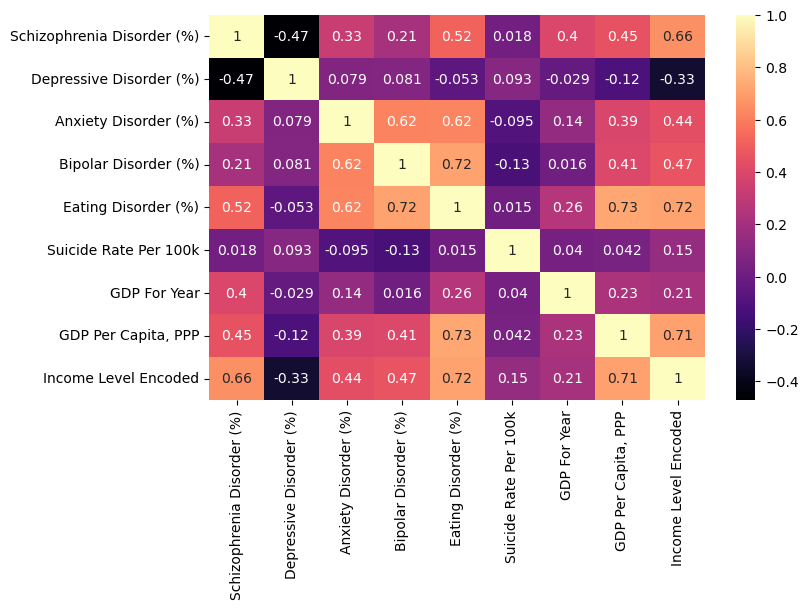

In [67]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_df, annot = True, cmap='magma');

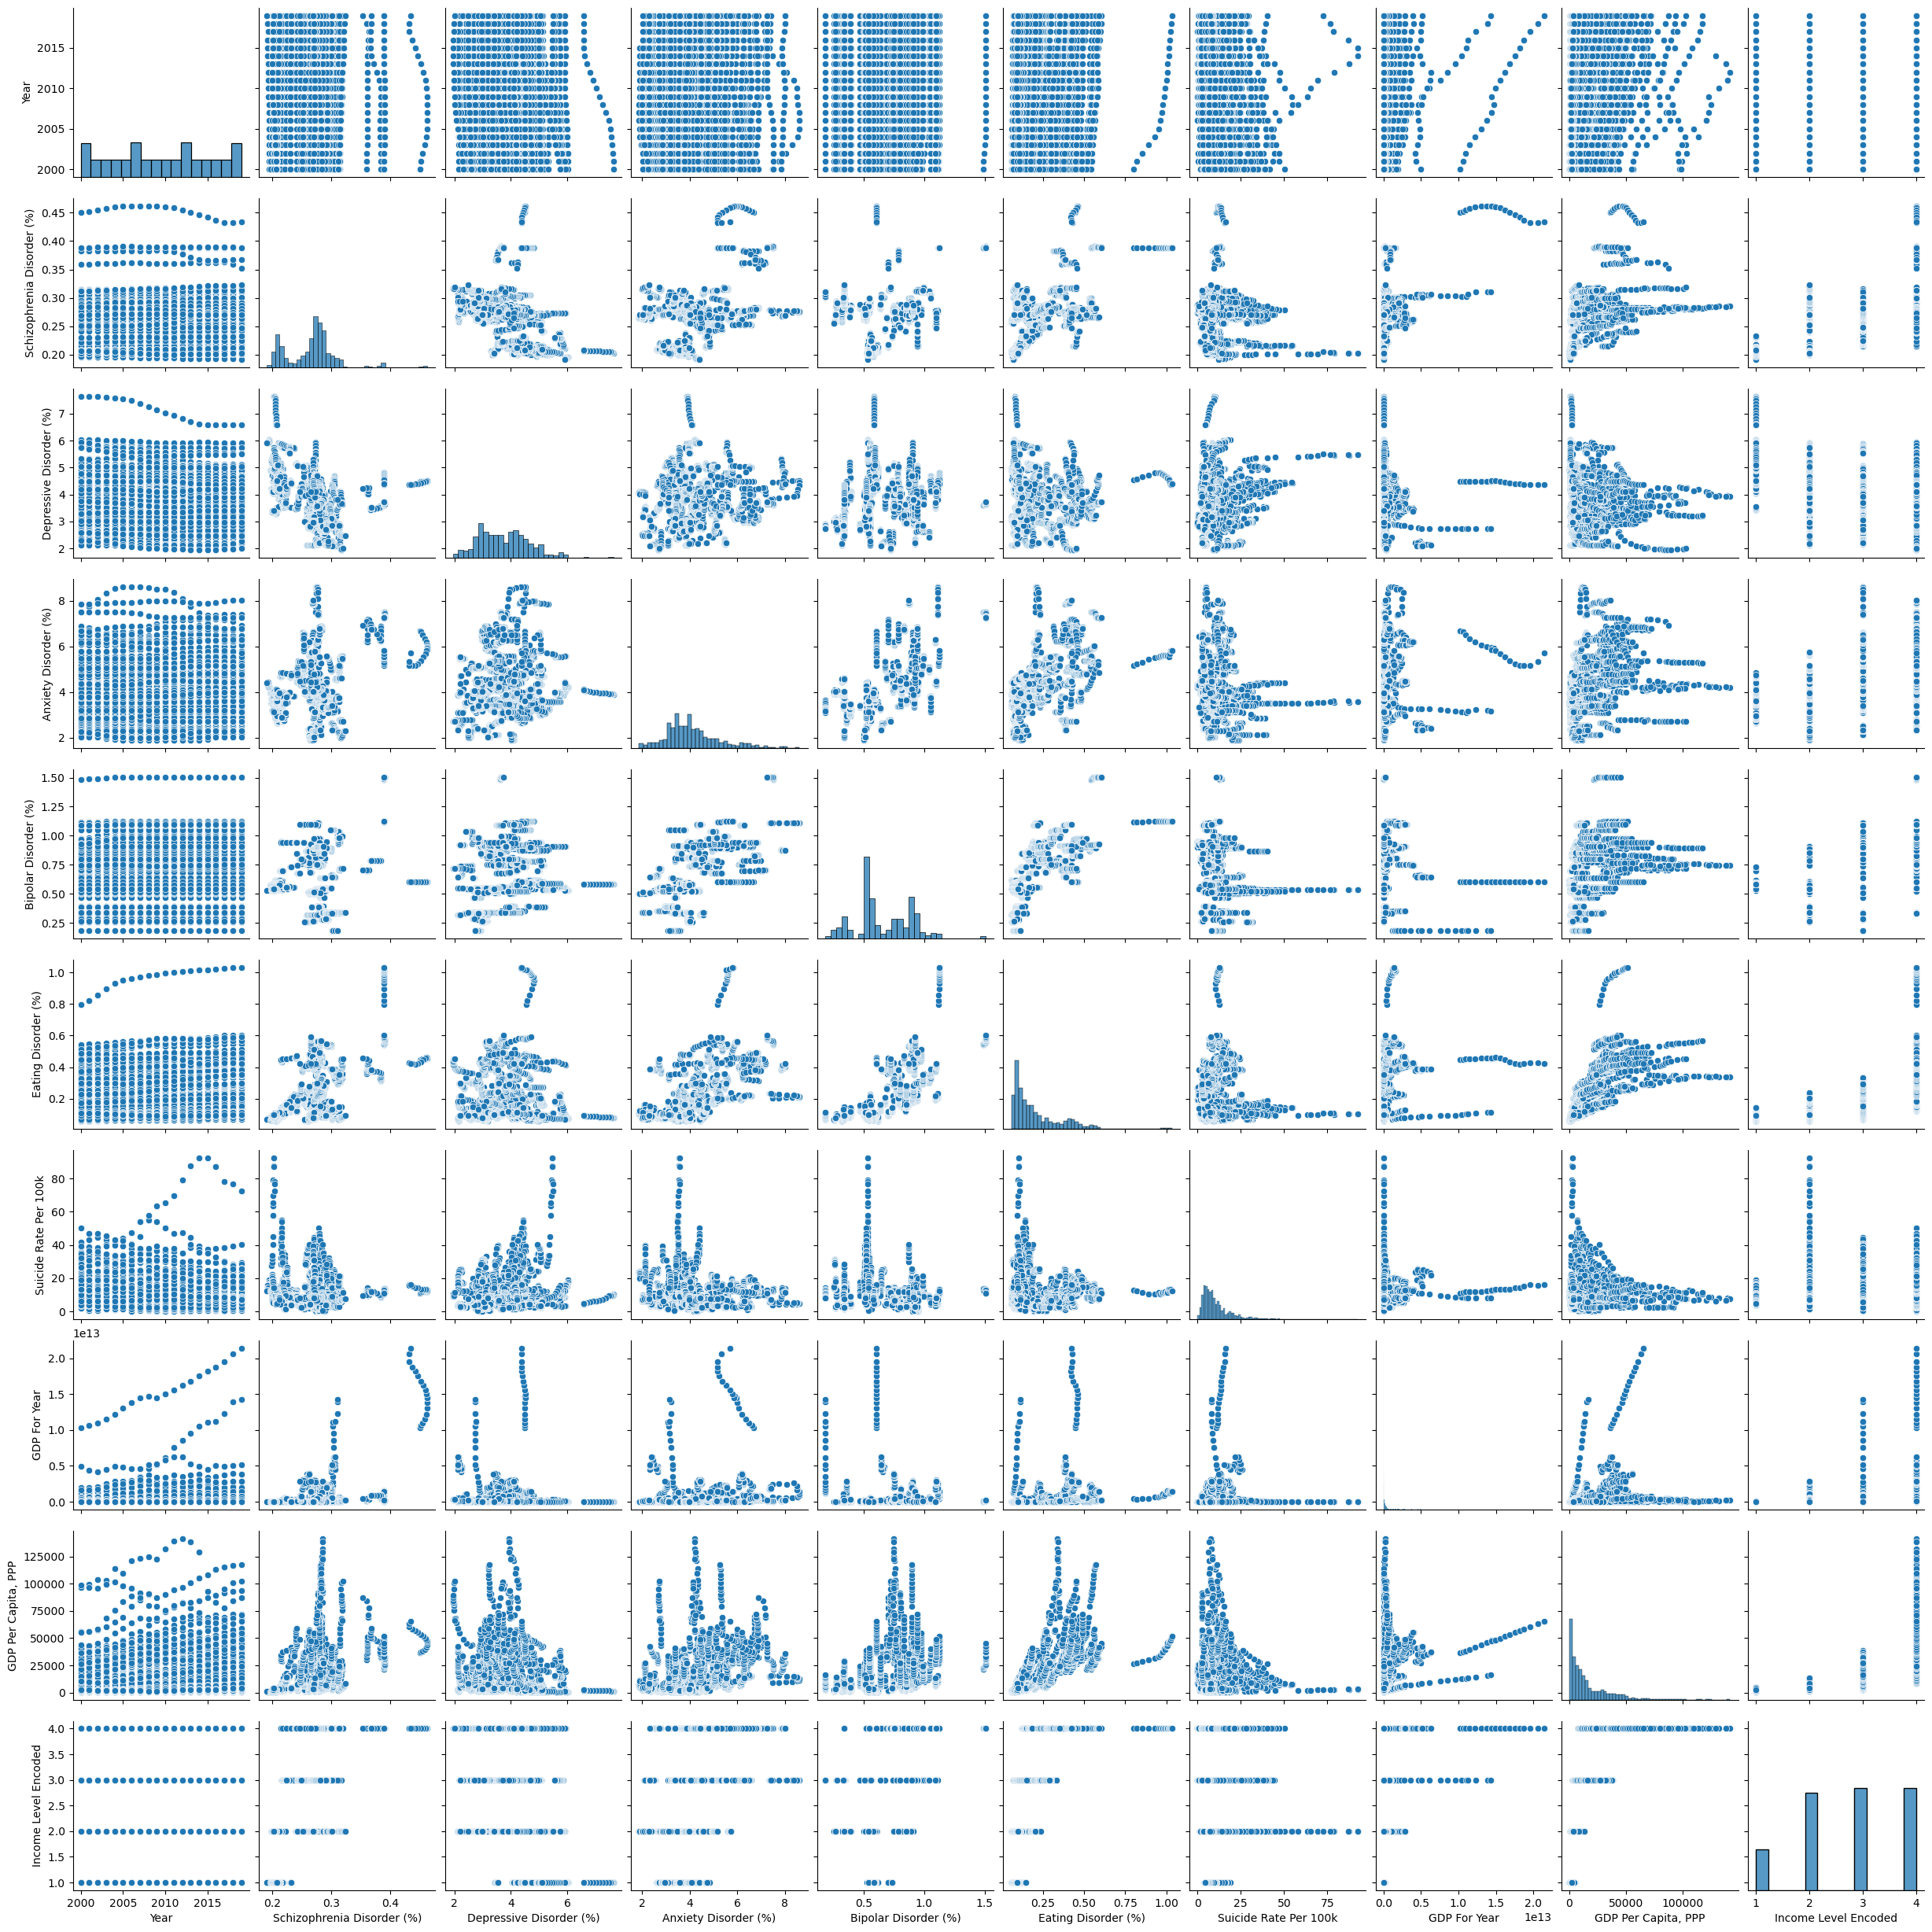

In [68]:
# Pairplot for Numericals

sns.pairplot(df);

In [69]:
corr_df.unstack().sort_values(ascending = False).drop_duplicates()

Schizophrenia Disorder (%)  Schizophrenia Disorder (%)    1.000000
Eating Disorder (%)         GDP Per Capita, PPP           0.728065
Income Level Encoded        Eating Disorder (%)           0.716302
Eating Disorder (%)         Bipolar Disorder (%)          0.715040
Income Level Encoded        GDP Per Capita, PPP           0.710077
Schizophrenia Disorder (%)  Income Level Encoded          0.660156
Eating Disorder (%)         Anxiety Disorder (%)          0.621941
Bipolar Disorder (%)        Anxiety Disorder (%)          0.619428
Schizophrenia Disorder (%)  Eating Disorder (%)           0.515015
Income Level Encoded        Bipolar Disorder (%)          0.465287
Schizophrenia Disorder (%)  GDP Per Capita, PPP           0.452406
Income Level Encoded        Anxiety Disorder (%)          0.435254
GDP Per Capita, PPP         Bipolar Disorder (%)          0.405647
GDP For Year                Schizophrenia Disorder (%)    0.398262
Anxiety Disorder (%)        GDP Per Capita, PPP           0.39

In [70]:
corr_df.unstack().sort_values(ascending = False)['Eating Disorder (%)']

Eating Disorder (%)           1.000000
GDP Per Capita, PPP           0.728065
Income Level Encoded          0.716302
Bipolar Disorder (%)          0.715040
Anxiety Disorder (%)          0.621941
Schizophrenia Disorder (%)    0.515015
GDP For Year                  0.261773
Suicide Rate Per 100k         0.014705
Depressive Disorder (%)      -0.053026
dtype: float64

,Schizophrenia Disorder (%),Depressive Disorder (%),Anxiety Disorder (%),Bipolar Disorder (%),Eating Disorder (%),Suicide Rate Per 100k,GDP For Year,"GDP Per Capita, PPP",Income Level Encoded
Schizophrenia Disorder (%),NaN,NaN,NaN,NaN,0.515015,NaN,NaN,NaN,0.660156
Depressive Disorder (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anxiety Disorder (%),NaN,NaN,NaN,0.619428,0.621941,NaN,NaN,NaN,NaN
Bipolar Disorder (%),NaN,NaN,0.619428,NaN,0.715040,NaN,NaN,NaN,NaN
Eating Disorder (%),0.515015,NaN,0.621941,0.715040,NaN,NaN,NaN,0.728065,0.716302
Suicide Rate Per 100k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GDP For Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"GDP Per Capita, PPP",NaN,NaN,NaN,NaN,0.728065,NaN,NaN,NaN,0.710077
Income Level Encoded,0.660156,NaN,NaN,NaN,0.716302,NaN,NaN,0.710077,NaN


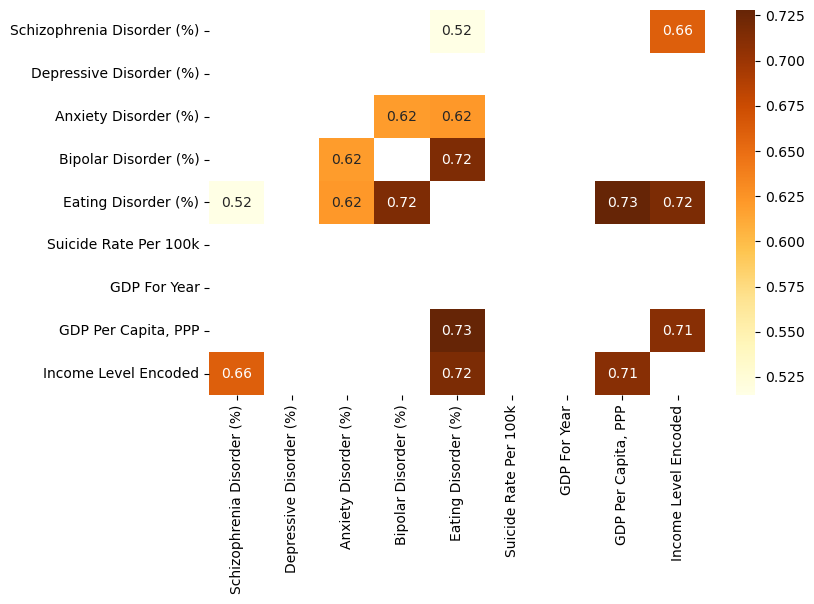

In [71]:
# Filter and show only disorders with correlation > 0.5
filt_df = corr_df[((corr_df > 0.5) | (corr_df < -0.5)) & (corr_df !=1.000)]
display(filt_df)

# Plot the filtered correlation matrix as a heatmap
plt.figure(figsize=(8,5))
sns.heatmap(filt_df, annot = True, cmap='YlOrBr');

#### Overall observations from correlation analysis

- **`Eating Disorder (%)`** is strongly positive correlated to **`GDP Per Capita, PPP`** followed by **`Bipolar Disorder (%)`**.
- **`Eating Disorder (%)`** is borderline positive correlated to **`Schizophrenia Disorder (%)`**
- **`Anxiety Disorder (%)`** is equally highly positive correlated to both **`Eating Disorder (%)`** and **`Bipolar Disorder (%)`**.
- I am quite surprised that **`Suicide Rate Per 100k`** is not significantly correlated to any of the other values. I was quite certain at least **`Depressive Disorder (%)`** should be correlated. This might be due to aggregation of suicide data despite their age group and genders. Also, the 2 dataset are from different sources.


#### Loading dataset into Power BI
- Dataset is transformed by unpivoting the various disorders columns into **`Disorders`** and **`Percentage`**
- **`Year`** is being converted to actual Year-date using **`Year Date = YEAR(DATE([Year],1,1))`**

#### The following charts are plotted with slicers **`Disorders`**, **`Year Date`**, **`Country`**:
- Bubble Map: Mental Disorders by Country
- Pie Chart: Mental Disorders %
- Line Chart: Mental Disorders and GDP Per Capita
- Line and Clustered Chart: Mental Disorder vs GDP Per Capita

#### Use observation to build the following models:
- For **`Simple Linear Regression`**, I shall use **`GDP Per Capita, PPP`** column.
- For **`Multiple Linear Regression (Correlated Selection)`**, I shall use only those columns which correlation is more than 0.5 as shown above.
- Lastly, I shall use all columns of the dataframe for **`Multiple Linear Regression (All)`**.

# 7. Simple Linear Regression

#### Objective and working of Simple Linear Regression
In Simple Linear Regression, we predict a dependent variable **`Eating disorders (%)`** based on the values in an independent variable **`GDP Per Capita, PPP`**.

- y = Our **target/output/dependent variable** which will be **`Eating disorders (%)`** which are going to predict.<br>
- X = Our **predictor/input/independent variable** which will be **`GDP Per Capita, PPP`** which has the highest correlation with Eating disorders (%).
- c/b = Constant value or y-intercept
- m/w = slope or coefficient of X
- e = error

#### Feature selection for Simple Linear Regression

In [77]:
X = df[['GDP Per Capita, PPP']] # Taking only one column as input variable
y = df[['Eating Disorder (%)']]  # I want to predict Eating disorders based on Bipolar disorders

#### Function for Model-Training and Predict

In [79]:
def train_predict(X, y, model, test_size):
    """
    Splits data into train and test sets, fits the model, and predicts the results.

    Parameters:
    X (DataFrame): Feature data.
    y (Series): Target data.
    model (sklearn model): Regression model.
    test_size (float): Proportion of the data to use as test set.
    
    Returns:
    tuple: Actual test set (y_test)
    tuple: Predictions on the test set (y_pred)
    model coefficients (model.coef_)
    model intercept
    """
    
    # Split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    # Instantiate the model
    #slr_model = slr_model
    print(model)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predicting the values for testing inputs
    y_pred = model.predict(X_test)
    
    return y_test, y_pred, model.coef_, model.intercept_

#### Model prediction

- Call the function to train the data and predict the the values
- Compare the predictions with actual output from testing data.

In [81]:
# instantiating the model and test size
model = LinearRegression()
test_size = 0.2

In [82]:
# Call the function 'train_predict' and return the 4 values
y_test, y_pred, slope, intercept = train_predict(X, y, model, test_size)

LinearRegression()


Compare the actual y (**`y_test`**) and predicted y (**`y_pred`**).

In [84]:
display(y_test[0:10])
display(y_pred[0:10])

# We can clearly see there is some +ve or -ve difference between the actual and predicted.

,Eating Disorder (%)
1601,0.069620
2227,0.076781
3110,0.092224
354,0.137463
2278,0.088803
1619,0.232982
2694,0.198684
1890,0.128646
533,0.108750
2118,0.122424


array([[0.11692383],
       [0.129932  ],
       [0.12127451],
       [0.16869912],
       [0.13426015],
       [0.24217891],
       [0.16841911],
       [0.17022109],
       [0.13034925],
       [0.15085779]])

In [85]:
def prediction_truth(y_pred, y_test):
    """
    Combines predictions and actual values into a DataFrame with columns:
    'truth', 'prediction', and 'pred-truth' (the difference between prediction and truth).
    
    Parameters:
    - y_pred (array): Predictions (numpy array).
    - y_test (DataFrame): Actual values (pandas DataFrame).
    
    Returns:
    - DataFrame: A DataFrame with 'truth', 'prediction', and 'pred-truth'.
    """
    
    # Reset index of y_test for alignment
    y_test_reset = y_test.reset_index(drop=True)
    
    # Convert y_pred to a DataFrame
    df_y_pred = pd.DataFrame(y_pred, columns=['prediction'])
    
    # Concatenate y_test DataFrame with y_pred DataFrame column-wise, ensuring alignment
    combined_y = pd.concat([y_test_reset.reset_index(drop=True), df_y_pred.reset_index(drop=True)], axis=1)
    
    # Rename the columns to 'truth' and 'prediction'
    combined_y.columns = ['truth', 'prediction']
    
    # Calculate the difference between prediction and truth
    combined_y['pred-truth'] = combined_y['prediction'] - combined_y['truth']
    
    return combined_y

In [86]:
combined_y = prediction_truth(y_pred, y_test)
combined_y.sample(20)  # Display the first 20 rows

,truth,prediction,pred-truth
514,0.540483,0.272413,-0.268071
572,0.452076,0.300236,-0.151839
430,0.271899,0.364432,0.092533
456,0.089276,0.129223,0.039946
556,0.124728,0.167344,0.042617
56,0.066432,0.115848,0.049416
46,0.384655,0.328629,-0.056026
364,0.109776,0.132811,0.023035
86,0.087708,0.120112,0.032404
592,0.103447,0.127955,0.024507


In [87]:
combined_y.describe()

,truth,prediction,pred-truth
count,630.000000,630.000000,630.000000
mean,0.200188,0.201223,0.001035
std,0.137078,0.100114,0.095944
min,0.061999,0.114851,-0.663090
25%,0.100257,0.132671,-0.032551
50%,0.146839,0.164868,0.026620
75%,0.246395,0.236113,0.045942
max,0.978650,0.868733,0.532332


Use any new value as input to predict **`Eating Disorder (%)`**

In [89]:
# Predicting 'Eating Disorder (%)' for 'GDP Per Capita, PPP' = 2222
newGDP = 2222 

# The  model takes inputs as array of values hence, we will convert the input
# to an array format

newInput = np.array(newGDP).reshape(-1, 1)  # reshape(-1, 1) means and 1 column and unknown number of rows
#newInput = newGDP

# Predicting the price for the given input
prediction = model.predict(newInput)

print("The predicted Eating Disorder (%) for GDP Per Capita, PPP at 2222: ", prediction)

The predicted Eating Disorder (%) for GDP Per Capita, PPP at 2222:  [[0.12397555]]


In [90]:
newInput.shape

(1, 1)

#### Model Evaluation
I shall evaluate the model's performance using the following performance metrics:
1. **`Mean Absolute Error (MAE)`**
2. **`Root Mean Squared Error (RMSE)`**
3. **`R-squared (R²)`**

In [92]:
def model_evaluation_metrics(y_test, y_pred):
    """
    Evaluates a regression model using common metrics: MAE, RMSE, and R-squared.
    Also calculates the model's accuracy as R-squared in percentage.
    
    Parameters:
    - y_pred (array): Predictions (numpy array).
    - y_test (DataFrame): Actual values (pandas DataFrame).
    
    Returns: mae, rmse, r2, and accuracy.
    """
    # Mean Absolute Error (MAE)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    
    # Root Mean Squared Error (RMSE)
    rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
    
    # R-squared (R²)
    r2 = metrics.r2_score(y_test, y_pred)
    
    # Accuracy of the model
    accuracy = round(r2 * 100)
    
    # Return the metrics in a dictionary
    return mae, rmse, r2, accuracy

In [93]:
# Call model_evaluation_metrics for calculation
mae, rmse, r2, accuracy = model_evaluation_metrics(y_test, y_pred)

# Mean Absolute Error (MAE)
print(f"Mean Absolute Error: {mae}")

# Root Mean Squared Error (RMSE)
print(f"Root Mean Squared Error: {rmse}")

# R-squared (R²)
print(f"R-squared: {r2}")

print("Accuracy of the Simple Linear Regression Model is:", round(r2*100, 2), "%")

Mean Absolute Error: 0.06395883971026409
Root Mean Squared Error: 0.0958734032713722
R-squared: 0.5100526563745699
Accuracy of the Simple Linear Regression Model is: 51.01 %


#### As the **`Accuracy is only around 50%`**, I felt that the prediction is not good enough. **`Eating Disorder (%)`** has high correlation with several other disorders as well. Taking that into consideration, I shall perform **`Multiple Linear Regression`** later.

#### Result Interpretation

To create an equation using the value from the model I developed.

In [96]:
# printing y intercept - 'a' in the above image
intercept

array([0.11190842])

In [97]:
# printing slope of dependent variable - 'b' in the above image
slope

array([[5.4307545e-06]])

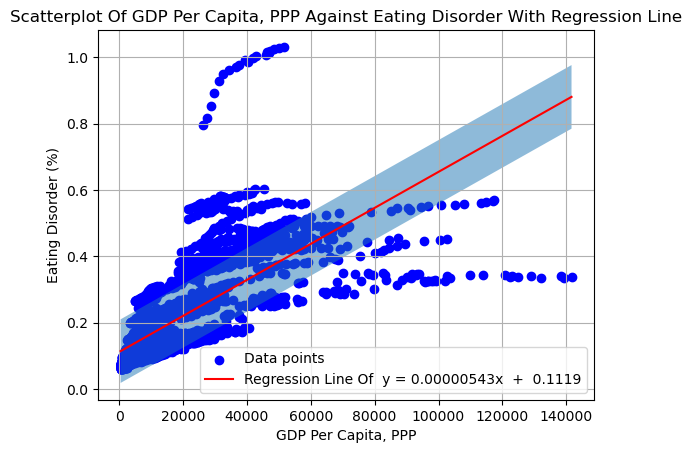

In [98]:
# Plot the scatterplot of 'Eating Disorder (%)' against 'GDP Per Capita, PPP' with slr_model
plt.scatter(df['GDP Per Capita, PPP'], df['Eating Disorder (%)'], color='blue', label='Data points')

# Calculate regression line values
x_values = np.array([df['GDP Per Capita, PPP'].min(), df['GDP Per Capita, PPP'].max()])
y_values = intercept + slope[0] * x_values
y_error = rmse

# Get a nicer name of "Regression Line" for the label of regression line below
regline_name = f"Regression Line Of  y = {slope[0][0]:.8f}x  +  {round(intercept[0],4)}"
#{slope[0]:.8f}

# Overlay the regression line
plt.plot(x_values, y_values, color="red", label=regline_name)

# Display the RMSE of the regression line
plt.fill_between(x_values, y_values - y_error, y_values + y_error, alpha=0.5)

plt.title("Scatterplot Of GDP Per Capita, PPP Against Eating Disorder With Regression Line", size="large")
plt.xlabel("GDP Per Capita, PPP", size="medium")
plt.ylabel("Eating Disorder (%)", size="medium")
plt.grid()
plt.legend()

plt.show()

# 8. Multiple Linear Regression (Correlated Selection)

#### Objective and working of Multiple Linear Regression

In Multiple Linear Regression, I shall predict a dependent variable **`Eating Disorder (%)`** based on the values in all 5 highly correlated variables.
 
- Y = Our **target/output/dependent variable** which will be **`Eating Disorder (%)`** which are going to predict.<br>
- Xs = **predictor/input/independent variables**. For the model building, I shall take 5 highly correlated variables.
- c/b = Constant value or y-intercept
- w/m = slopes or coefficients of Xs. Please note that the slope of different inputs (Xs) may be different.
- e = error

#### Feature selection for Multiple Linear Regression

Now, I shall use the values of these 5 independent variables:
- **`GDP Per Capita, PPP`**
- **`Income Level Encoded`**
- **`Bipolar Disorder (%)`**
- **`Anxiety Disorder (%)`**
- **`Schizophrenia Disorder (%)`**


In [101]:
# Drop everything except the selected 4
X = df[['GDP Per Capita, PPP', 'Income Level Encoded', 'Bipolar Disorder (%)', 'Anxiety Disorder (%)', 'Schizophrenia Disorder (%)']]
y = df[['Eating Disorder (%)']] # output

#### Model Prediction
- Call the function to train the data and predict the the values
- Compare the predictions with actual output from testing data.

In [103]:
# instantiating the model and test size
model = LinearRegression()
test_size = 0.2

In [104]:
# Call the function 'train_predict' and return the 4 values
y_test, y_pred, slope, intercept = train_predict(X, y, model, test_size)

LinearRegression()


Compare the actual y (**`y_test`**) and predicted y (**`y_pred`**)

In [106]:
combined_y = prediction_truth(y_pred, y_test)
combined_y.sample(20)  # Display the first 20 rows

,truth,prediction,pred-truth
215,0.423612,0.331407,-0.092204
541,0.095975,0.079836,-0.016139
266,0.093757,0.080606,-0.013151
583,0.177606,0.200136,0.022530
343,0.385249,0.367303,-0.017945
331,0.188711,0.228034,0.039324
622,0.100074,0.137296,0.037222
308,0.380097,0.362895,-0.017201
203,0.098282,0.087804,-0.010477
64,0.199012,0.257783,0.058771


In [107]:
combined_y.describe()

,truth,prediction,pred-truth
count,630.000000,630.000000,630.000000
mean,0.199279,0.201964,0.002685
std,0.141652,0.127227,0.065904
min,0.061414,0.038860,-0.507175
25%,0.098014,0.084268,-0.021132
50%,0.149168,0.175538,0.001529
75%,0.243984,0.300146,0.037586
max,1.028413,0.628691,0.248658


Use new values from columns of **`GDP Per Capita, PPP`**, **`Income Level Encoding`**, **`Bipolar Disorder (%)`**, **`Anxiety Disorder (%)`** and **`Schizophrenia Disorder (%)`** in any random row as input to predict the value of **`Eating Disorder (%)`**

In [109]:
# Generate a random index
random_index = np.random.randint(0, len(X))

display(X.iloc[random_index])
newData = X.iloc[random_index]   # Just taking any random column for predicting.

# The  model takes inputs as array of values hence, we will conver the input
# to an array format

newInput = np.array(newData).reshape(1, -1)  # reshape(1, -1) means and 1 row and unknown number of columns

# Predicting the price for the given input
prediction = model.predict(newInput)

print("The predicted Eating Disorder (%) for the given 4 inputs is: ", prediction)

GDP Per Capita, PPP           3547.130000
Income Level Encoded             2.000000
Bipolar Disorder (%)             0.316715
Anxiety Disorder (%)             3.901262
Schizophrenia Disorder (%)       0.270625
Name: 1966, dtype: float64

The predicted Eating Disorder (%) for the given 4 inputs is:  [[0.06614001]]


#### Model Evaluation
I shall evaluate the model's performance using the following performance metrics:
1. **`Mean Absolute Error (MAE)`**
2. **`Root Mean Squared Error (RMSE)`**
3. **`R-squared (R²)`**


In [111]:
# Call model_evaluation_metrics for calculation
mae, rmse, r2, accuracy = model_evaluation_metrics(y_test, y_pred)

# Mean Absolute Error (MAE)
print(f"Mean Absolute Error: {mae}")

# Root Mean Squared Error (RMSE)
print(f"Root Mean Squared Error: {rmse}")

# R-squared (R²)
print(f"R-squared: {r2}")

print("Accuracy of the Multiple Linear Regression (Correlated Selection) Model is:", round(r2*100, 2), "%")

Mean Absolute Error: 0.039958977715594195
Root Mean Squared Error: 0.06590621254445284
R-squared: 0.783181441025867
Accuracy of the Multiple Linear Regression (Correlated Selection) Model is: 78.32 %


#### Now the Accuracy is close to **`80%`**. It is a significant improvement from the Single Regression.

# 9. Multiple Linear Regression (All)

#### Objective and working of Multiple Linear Regression (All)

In Multiple Linear Regression, I shall predict a dependent variable **`Eating Disorder (%)`** based on the values in all other independent variables.
 
- Y = Our **target/output/dependent variable** which will be **`Eating Disorder (%)`** which are going to predict.<br>
- Xs = **predictor/input/independent variables**. For the model building, I shall take all variables of the dataframe.
- c/b = Constant value or y-intercept
- w/m = slopes or coefficients of Xs. Please note that the slope of different inputs (Xs) may be different.
- e = error

#### Feature selection for Multiple Linear Regression (All)

To use all the values, I must:
- Apply One-Hot Encoding to **`Country`** with get_dummies()

In [115]:
# Apply One-Hot Encoding to the 'Country' column
encoded_df = pd.get_dummies(df, columns=['Country'])

encoded_df.sample(15)

,Year,Schizophrenia Disorder (%),Depressive Disorder (%),Anxiety Disorder (%),Bipolar Disorder (%),Eating Disorder (%),Suicide Rate Per 100k,GDP For Year,"GDP Per Capita, PPP",Income Level,...,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Vietnam,Country_Zambia,Country_Zimbabwe
2356,2006,0.283613,4.108052,4.283547,0.753427,0.343215,6.8,6.088214e+10,120838.17,High income,...,False,False,False,False,False,False,False,False,False,False
2928,2019,0.281010,3.049742,2.341513,0.505899,0.152483,5.7,4.523143e+10,16195.54,Upper middle income,...,False,False,False,False,False,False,False,False,False,False
813,2019,0.277870,3.823103,4.500350,0.910109,0.229979,4.9,8.894130e+10,19191.58,Upper middle income,...,False,False,False,False,False,False,False,False,False,False
1929,2015,0.242216,5.095763,4.754819,0.745480,0.180199,7.4,1.011798e+11,7024.96,Lower middle income,...,False,False,False,False,False,False,False,False,False,False
2413,2003,0.286811,2.863366,3.920784,0.274710,0.085301,13.2,3.388386e+08,4228.75,Lower middle income,...,False,False,False,False,False,False,False,False,False,False
937,2003,0.292409,2.926211,3.948391,0.274700,0.096381,9.7,2.300454e+09,6520.70,Upper middle income,...,False,False,False,False,False,False,False,False,False,False
1539,2005,0.279676,3.958981,3.750495,0.520848,0.137538,26.5,1.700346e+10,13913.79,High income,...,False,False,False,False,False,False,False,False,False,False
2450,2001,0.262726,4.046217,4.411675,0.764993,0.252245,3.3,1.841375e+11,39240.76,High income,...,False,False,False,False,False,False,False,False,False,False
1501,2007,0.260078,2.982711,3.997926,0.257211,0.068044,30.9,1.326717e+08,1800.69,Lower middle income,...,False,False,False,False,False,False,False,False,False,False
261,2003,0.270443,4.103709,3.515903,0.521197,0.102895,42.9,1.782779e+10,7367.19,Upper middle income,...,False,False,False,False,False,False,False,False,False,False


In [116]:
X = encoded_df.drop(['Eating Disorder (%)', 'Income Level'], axis=1)
y = encoded_df[["Eating Disorder (%)"]]

#### Model Prediction
- Call the function to train the data and predict the the values
- Compare the predictions with actual output from testing data.

In [118]:
model = LinearRegression()
test_size = 0.2

In [119]:
# Call the function 'train_predict' and return 
y_test, y_pred, slope, intercept = train_predict(X, y, model, test_size)

LinearRegression()


Compare the actual y (**`y_test`**) and predicted y (**`y_pred`**)

In [121]:
combined_y = prediction_truth(y_pred, y_test)
combined_y.sample(20)  # Display the first 20 rows

,truth,prediction,pred-truth
245,0.284008,0.281025,-0.002983
176,0.430502,0.438612,0.008110
308,0.085643,0.080128,-0.005515
260,0.184533,0.179007,-0.005526
524,0.095436,0.097780,0.002344
387,0.135299,0.133844,-0.001455
534,0.075986,0.080102,0.004116
581,0.213937,0.211235,-0.002702
161,0.405392,0.397155,-0.008236
113,0.257366,0.250044,-0.007322


In [122]:
combined_y.describe()

,truth,prediction,pred-truth
count,630.000000,630.000000,630.000000
mean,0.203657,0.203323,-0.000334
std,0.139317,0.138703,0.006574
min,0.062565,0.061093,-0.037627
25%,0.099902,0.100491,-0.002843
50%,0.150972,0.150765,0.000029
75%,0.262681,0.264301,0.002669
max,1.003214,0.965587,0.024210


In [123]:
# Call model_evaluation_metrics for calculation
mae, rmse, r2, accuracy = model_evaluation_metrics(y_test, y_pred)

# Mean Absolute Error (MAE)
print(f"Mean Absolute Error: {mae}")

# Root Mean Squared Error (RMSE)
print(f"Root Mean Squared Error: {rmse}")

# R-squared (R²)
print(f"R-squared: {r2}")

print("Accuracy of the Multiple Linear Regression (All) Model is:", round(r2*100, 2), "%")

Mean Absolute Error: 0.0044883628978369386
Root Mean Squared Error: 0.006577316303782701
R-squared: 0.9977675699106462
Accuracy of the Multiple Linear Regression (All) Model is: 99.78 %


#### Finally the Accuracy is close to **`100%`**!